In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "D:\Projects\IMC_Challenge\logs\814bb152-163c-4ab7-a3ca-46c2d7364c00.log"
df = pd.read_csv(path, sep=";",skiprows=range(0, 10005),nrows=4000)
df['mid_price'] = (df['bid_price_1']+df['ask_price_1'])/2
print(df.columns.values.tolist())

# create dataframes for separate instruments and calculate rolling averages
df_am = df.loc[df["product"] == "AMETHYSTS"]
df_am['it'] = df_am['timestamp']/100
df_am['20it_rolling'] = df_am['mid_price'].rolling(20).mean()

df_star = df.loc[df["product"] == "STARFRUIT"]
df_star['it'] = df_star['timestamp']/100
df_star['20it_rolling'] = df_star['mid_price'].rolling(20).mean()


['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss']


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\reves\AppData\Local\Temp\ipykernel_11616\4016334151.py:1: SyntaxWarning: invalid escape sequence '\P'
  path = "D:\Projects\IMC_Challenge\logs\814bb152-163c-4ab7-a3ca-46c2d7364c00.log"
C:\Users\reves\AppData\Local\Temp\ipykernel_11616\4016334151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am['it'] = df_am['timestamp']/100
C:\Users\reves\AppData\Local\Temp\ipykernel_11616\4016334151.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

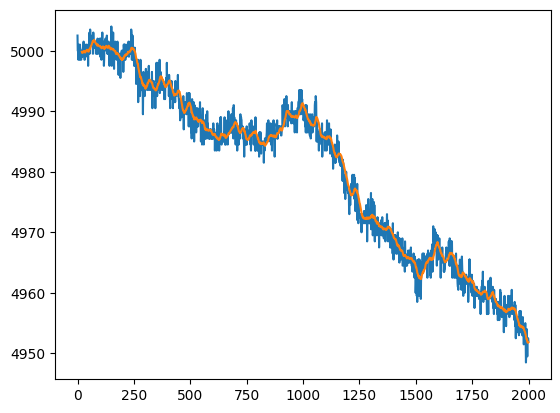

In [3]:
plt.plot(df_star['it'],df_star['mid_price'])
plt.plot(df_star['it'],df_star['20it_rolling'])

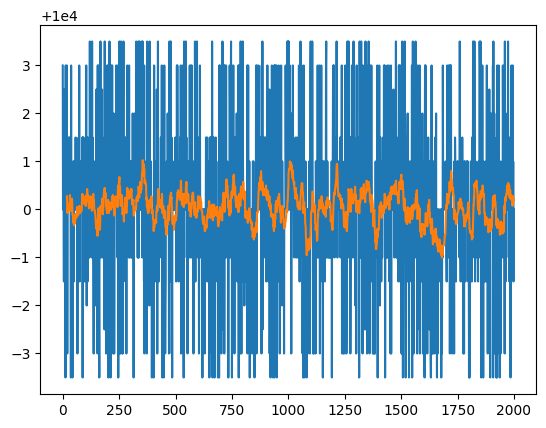

In [4]:
plt.plot(df_am['it'], df_am['mid_price'])
plt.plot(df_am['it'],df_am["20it_rolling"])

(array([  56.,    0.,    0.,   97.,    0.,    0.,    0.,   10.,    0.,
           0.,   15.,    0.,    0.,    0.,   94.,    0.,    0.,  172.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1059.,    0.,
           0.,    0.,    0.,    0.,    0.,  190.,    0.,    0.,  102.,
           0.,    0.,    0.,   19.,    0.,    0.,   10.,    0.,    0.,
           0.,  119.,    0.,    0.,   57.]),
 array([ 9996.5 ,  9996.64,  9996.78,  9996.92,  9997.06,  9997.2 ,
         9997.34,  9997.48,  9997.62,  9997.76,  9997.9 ,  9998.04,
         9998.18,  9998.32,  9998.46,  9998.6 ,  9998.74,  9998.88,
         9999.02,  9999.16,  9999.3 ,  9999.44,  9999.58,  9999.72,
         9999.86, 10000.  , 10000.14, 10000.28, 10000.42, 10000.56,
        10000.7 , 10000.84, 10000.98, 10001.12, 10001.26, 10001.4 ,
        10001.54, 10001.68, 10001.82, 10001.96, 10002.1 , 10002.24,
        10002.38, 10002.52, 10002.66, 10002.8 , 10002.94, 10003.08,
        10003.22, 10003.36, 10003.5 ]),
 <BarContainer o

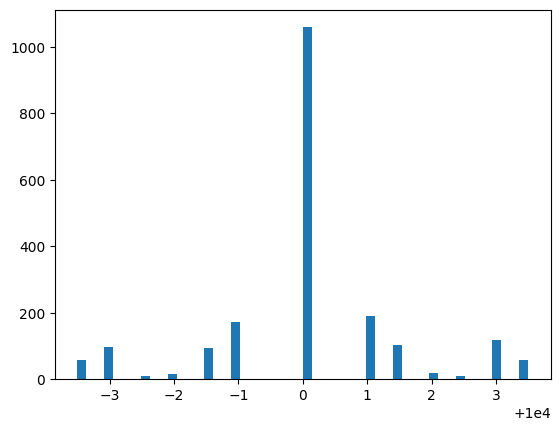

In [5]:
plt.hist(df_am['mid_price'],bins=50)

In [6]:
np.array(df_star['mid_price'])

array([5002.5, 5000. , 5000. , ..., 4952.5, 4952.5, 4952. ])

In [54]:
X = []
Y = []
trend = np.array(df_star['mid_price'].to_list())
timestep = 5

for i in range(len(trend)-timestep-1):
    sublist = np.concatenate((trend[i:i+timestep],trend[i:i+timestep]**2, trend[i:i+timestep]**3))
    X.append(trend[i:i+timestep]) # trend[i:i+timestep]
    Y.append(trend[i+timestep])

X = np.array(X)
Y = np.array(Y)

In [55]:
X.shape

(1994, 5)

In [56]:
def create_train_test_set(df_Stock,timestep):
    """
    the data is organized in a format to train the model:
    mp_t = a+b1*mp_(t-1)+b2*mp_(t-2)...
    timestep: number of previous midprice (mp) values to use in the model
    """
    features = []
    for i in range(len(df_Stock['midprice'])-timestep):
        features.append(df_Stock['midprice'][i:i+timestep])
    
    target = df_Stock['Close_forcast']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [59]:
from sklearn.linear_model import LinearRegression

#X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

lr = LinearRegression()
lr.fit(X[:1000,:], Y[:1000])
Y_pred = lr.predict(X)

print(lr.coef_)
print(lr.intercept_)

[0.16179295 0.14453001 0.20387022 0.16503886 0.31240748]
61.6762187870645


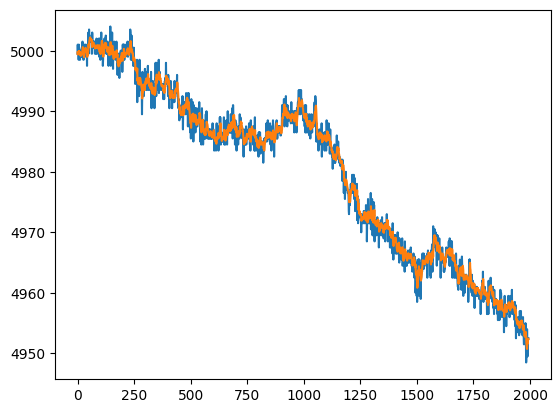

In [58]:
plt.plot(Y)
plt.plot(Y_pred)

In [51]:
X.shape

(1994, 15)

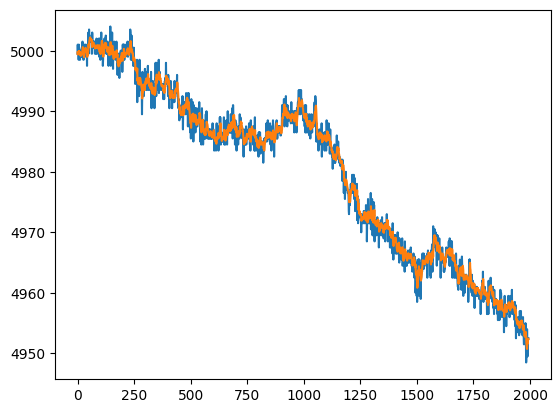

In [45]:
plt.plot(Y)
plt.plot(Y_pred)

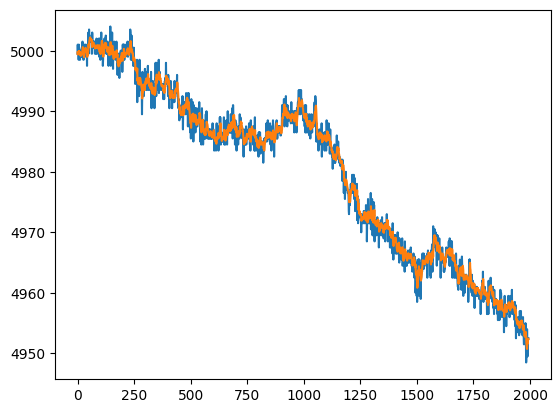

In [28]:
plt.plot(Y)
plt.plot(Y_pred)


In [39]:
from sklearn.linear_model import LinearRegression

#X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

lr = LinearRegression()
lr.fit(X[:1000,:], Y[:1000])

LinearRegression()

In [43]:
lr.coef_
lr.intercept_

61.6762187870645

In [45]:
Y_pred = lr.predict(X[1000:,:])

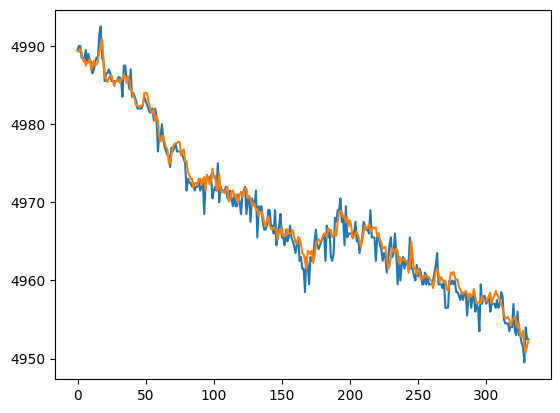

In [52]:
plt.plot(Y[1000::3])
plt.plot(Y_pred[::3])


In [52]:
dictt = {"amethist": 1}

In [53]:
dictt["amethist"]

1